# Determination of the electrostatic potential 

## Theorethical background

#### 1) Laplace's Equation

- Laplace's equation, is a fundamental partial differential equation (PDE) in physics. In electrostatics, it describes the electrostatic potential $V$ in a region of space that is free of electric charge 

- linear, homogenous, second-order partial differential equation

$\nabla^2 V(x,y) = 0$

$\nabla^2 =$  Laplacian (represents the divergence of the gradient of the potential V)

$\nabla^2 V = \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2V}{\partial y^2}$

- as mentioned before the equation must be solved in a charge-free region:

$\frac{\partial^2V(x,y)}{\partial x^2} + \frac{\partial^2V(x,y)}{\partial y^2} = 0$

#### 2) Boundary conditions

- Dirichlet Boundary Condition

- Outer Boundaries(all four sides) : V = 0

V(x,0) = 0, for $0 \le x \le 1 $ (Bottom edge)

V(x,1) = 0, for $0 \le x \le 1$ (Top edge)

V(0,y) = 0, for $0 \le y \le 1$ (Left edge)

V(1,y) = 0, for $0 \le y \le 1$ (Right edge)

- Inner circular conductor: V = 1

- radius r = 0.2 centered at (0.5, 0.5), we use the formula for any point (x,y) on or inside the circle:


$(x - 0.5)^2 + (y - 0.5)^2 \le (0.2)^2$

- for all point satisfying this inequality, the potential is fixed V(x,y) = 1

#### 3)Numerical Method : Finite Difference Discretization

- this is essential here because the problem is mixed geometry a circular conductor V = 1 inside a square boundary V = 0 makes finding an exact closed form analytical formula for V(x,y) practically impossible. This method transforms the complex calculus problem into a large but much simpler system of algebraic equation that our computer will be able to solve

 We create a grid - we discretize the continous domain $[0,1] \times [0,1]$ into a grid of N $\times$ N points, the grid spacing is $h = \frac{1}{(N-1)}$, so the point (x,y) is now represented by its grid indices (i,j):

 $x_{i} = i * h$

 $y_{j} = j * h$

 $V(x_{i}, y_{j}) = V_{i,j}$

 We need to approximate the derivatives - this mean we replace the continous partial derivatives with algebraic approximations using the central difference formula which is accurate to the order $O(h^2)$

 - second derivative with respect to x:

 $\frac{\partial^2 V}{\partial x^2} |_{(i,j)} = \frac{V(x_i + h, y_j) - 2V(x_i, y_j) + V(x_i-h, y_j)}{h^2} = \frac{V_{i+1} -2V_{i,j} + V_{i-1,j}}{h^2}$

 - second derivative with respect to y:

 $\frac{\partial^2 V}{\partial y^2} |_{i,j} = \frac{V(x_i, y_{j+h}) - 2V(x_i,y_j) + V(x_i, y_{j-h})}{h^2} = \frac{V_{i,j+1} - 2V_i,j + V_{i,j-1}}{h^2}$

Now we need to form the distretized Equation we substitue everything back into the Laplace equation:

$$\frac{V_{i+1,j} - 2V_{i,j} + V_{i-1,j}}{h^2} + \frac{V_{i,j+1} - 2V_{i,j} + V_{i,j-1}}{h^2} = 0$$

- multiply by $h^2$

$$(V_{i+1,j} - 2V_{i,j} + V_{i-1,j}) + (V_{i,j+1} - 2V_{i,j} + V_{i,j-1}) = 0$$

- group the terms:

$$V_{i+1,j} + V_{i-1,j} + V_{i,j+1} + V_{i,j-1} - 4V_{i,j} = 0$$

$$V_{i,j} = \frac{1}{4} (V_{i+1,j} + V_{i-1,j} + V_{i,j+1} + V_{i,j-1})$$

- this formula is the most important part when we are going to implement the algorithms


#### 4) The Algorithms

##### 1) Gauss-Seidel Method - this method updates $V_{i,j}$ using the most recent values at hand, i=1...N-1 and j=1...N-1

$$V_{i,j}^{(k+1)} = \frac{1}{4} \left( V_{i+1,j}^{(k)} + V_{i-1,j}^{(k+1)} + V_{i,j+1}^{(k)} + V_{i,j-1}^{(k+1)} \right)$$

- the left neighbour (i-1) and the bottom neighbor (j-1) use the new (k+1)

##### 2) Successive Over-Relaxation(SOR) - the more efficient method it first calculates the Gauss-Seidel then correts the value using a relaxation parameter $\omega$ (where $1 < \omega < 2$)

Steps for SOR:

Calculate the Gauss-Seidel update value, $V_{i,j}^{GS}$:

$$V_{i,j}^{GS} = \frac{1}{4} \left( V_{i+1,j}^{(k)} + V_{i-1,j}^{(k+1)} + V_{i,j+1}^{(k)} + V_{i,j-1}^{(k+1)} \right)$$

Calculate the change (the "residual"):

$$\Delta V = V_{i,j}^{GS} - V_{i,j}^{(k)}$$

Apply the SOR update formula:

$$V_{i,j}^{(k+1)} = V_{i,j}^{(k)} + \omega \cdot \Delta V$$

Combining these steps gives the full SOR update formula in one line:

$$V_{i,j}^{(k+1)} = (1 - \omega) V_{i,j}^{(k)} + \frac{\omega}{4} \left( V_{i+1,j}^{(k)} + V_{i-1,j}^{(k+1)} + V_{i,j+1}^{(k)} + V_{i,j-1}^{(k+1)} \right)$$

NOTE: this formula only applies to the grid points that are not part of the boundary cases V=0 and V=1

##### 3) Jacobi method

- we need to maintain two separate 2D arrays:

$V_{old}$ = where we read the values from the k iteration 

$V_{new}$ = where we read the value from the k+1 iteration

- after we loop trough all points we check for convergence and then set $V_{old} = V_{new}$


Jacobi Update Formulas

Let $V^{(k)}_{i,j}$ be the potential at grid point $(i, j)$ at iteration $k$.

1. For Fixed Boundary Nodes

(Class 1: Outer $V=0$, Class 2: Inner $V=1$)The value is fixed and never changes.

$$V^{(k+1)}_{i,j} = V_{i,j}^{\text{fixed}}$$

(This is $0$ or $1$, depending on the boundary).

2. For Regular Interior Nodes

(Class 3: Unknown nodes with no "short-grid" neighbors)

The new value $V^{(k+1)}_{i,j}$ is the average of its four neighbors, all read from the previous $k$ iteration.

$$V^{(k+1)}_{i,j} = \frac{1}{4} \left( V^{(k)}_{i+1,j} + V^{(k)}_{i-1,j} + V^{(k)}_{i,j+1} + V^{(k)}_{i,j-1} \right)$$

Notice that every term on the right-hand side has the superscript $(k)$.

3. For Irregular Interior Nodes

(Class 4: Unknown nodes next to the curved $V=1$ boundary)The same Jacobi principle applies. You use the modified formula for unequal spacing, but you only read neighbor values from the $k$ iteration.

For example (if the "right" neighbor is a short-grid boundary at distance $\alpha h$):

$$V^{(k+1)}_{i,j} = \frac{\alpha}{2(1+\alpha)} \left[ 2 \left( \frac{V^{(k)}_{i-1,j}}{1+\alpha} + \frac{1}{\alpha(1+\alpha)} \right) + V^{(k)}_{i,j+1} + V^{(k)}_{i,j-1} \right]$$

Again, all $V$ terms on the right-hand side are from the $k$ iteration.












In [23]:
#1.Discretize

import numpy as np
import matplotlib.pyplot as plt
import time

N = 101
tolerance = 1e-3
h = 1.0/(N-1)

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)

xx,yy = np.meshgrid(x, y)

V_initial = np.zeros((N,N))
V_new = np.zeros((N,N))

is_boundary = np.full((N,N), False, dtype= bool)

is_boundary[0, :] = True
is_boundary[N-1, :] = True
is_boundary[:, 0] = True
is_boundary[:, N-1] = True

start_initial = time.process_time()

for i in range(N):
    for j in range(N):
        x = i * h
        y = j * h
        if (x-0.5)**2 + (y-0.5)**2 <= 0.2**2:
            V_initial[i,j] = 1
            is_boundary[i, j] = True 

V_new = V_initial.copy()

end_initial = time.process_time()

print("Discretization and boundary are set!")
print('CPU execution time:', end_initial - start_initial, 'seconds')



Discretization and boundary are set!
CPU execution time: 0.006043543000004092 seconds


Iteration 1, max change 0.5
Iteration 2, max change 0.25
Iteration 3, max change 0.125
Iteration 4, max change 0.125
Iteration 5, max change 0.0908203125
Iteration 6, max change 0.07568359375
Iteration 7, max change 0.0655517578125
Iteration 8, max change 0.050994873046875
Iteration 9, max change 0.049152374267578125
Iteration 10, max change 0.042083740234375
Iteration 11, max change 0.03823447227478027
Iteration 12, max change 0.03497898578643799
Iteration 13, max change 0.030666187405586243
Iteration 14, max change 0.02944568544626236
Iteration 15, max change 0.025216445326805115
Iteration 16, max change 0.02512262063100934
Iteration 17, max change 0.022246936743613333
Iteration 18, max change 0.021703868609620258
Iteration 19, max change 0.019864947706082603
Iteration 20, max change 0.01896100589692651
Iteration 21, max change 0.0178324452247125
Iteration 22, max change 0.016728676655475283
Iteration 23, max change 0.01609454551370959
Iteration 24, max change 0.014887400561129027
It

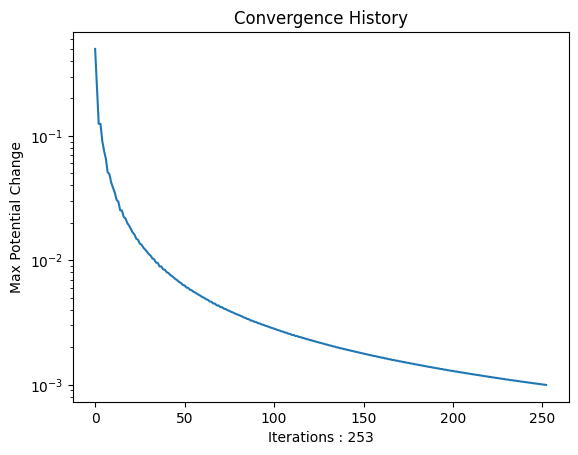

In [24]:
#2.Jacobi method

V_1 = V_initial.copy()
max_change  = 1.0
iterations = 0
convergence_history_jacobi = []

start_1 = time.process_time()

while max_change > tolerance:
    max_change = 0.0

    for i in range(1, N-1):
        for j in range(1, N-1):
            if not is_boundary[i,j]:
                new_potential = 0.25 * (V_1[i+1, j] + V_1[i-1, j] + V_1[i, j-1] + V_1[i, j+1])
                V_new[i, j] = new_potential
                change = abs(new_potential - V_1[i, j])
                if change > max_change:
                    max_change = change


    convergence_history_jacobi.append(max_change)
    V_1 = V_new.copy()
    iterations += 1
    print(f"Iteration {iterations}, max change {max_change}") #just for info

end_1 = time.process_time()

print(f"Jacobi converged in {iterations} iterations")
print('CPU execution time', end_1 - start_1, 'second')

plt.plot(convergence_history_jacobi)
plt.yscale('log') 
plt.title('Convergence History')
plt.xlabel(f'Iterations : {iterations}')
plt.ylabel('Max Potential Change')
plt.show()



Iterations for gauss: 201
CPU execution time 2.815238887999996 seconds


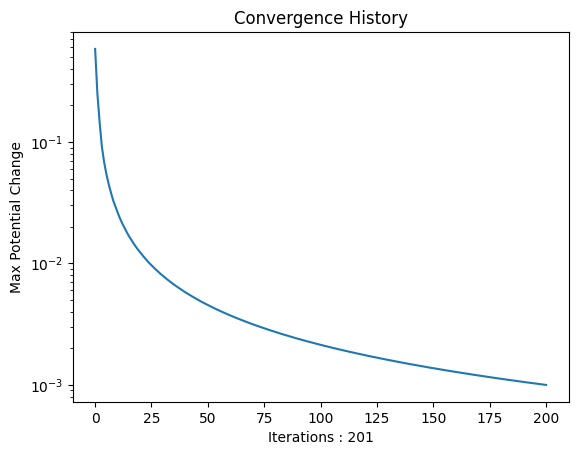

In [25]:
#2.Gauss-Seidel


convergence_history_gauss = []
max_change = 1.0
iterations_gauss = 0
V_2 = V_initial.copy()

start_2 = time.process_time()

while max_change > tolerance:
    max_change = 0.0
    for i in range(1, N-1):
        for j in range(1, N-1):
            if not is_boundary[i,j]:
                old_potential = V_2[i, j]
                V_gauss = 0.25 * (V_2[i+1, j] + V_2[i-1, j] + V_2[i, j+1] + V_2[i, j-1])
                new_potential = V_gauss
                V_2[i, j] = new_potential
                change = abs(new_potential - old_potential)
                if change > max_change:
                    max_change = change

    convergence_history_gauss.append(max_change)
    iterations_gauss += 1


end_2 = time.process_time()

print(f'Iterations for gauss: {iterations_gauss}')

print('CPU execution time', end_2 - start_2, 'seconds')

plt.plot(convergence_history_gauss)
plt.yscale('log') 
plt.title('Convergence History')
plt.xlabel(f'Iterations : {iterations_gauss}')
plt.ylabel('Max Potential Change')
plt.show()


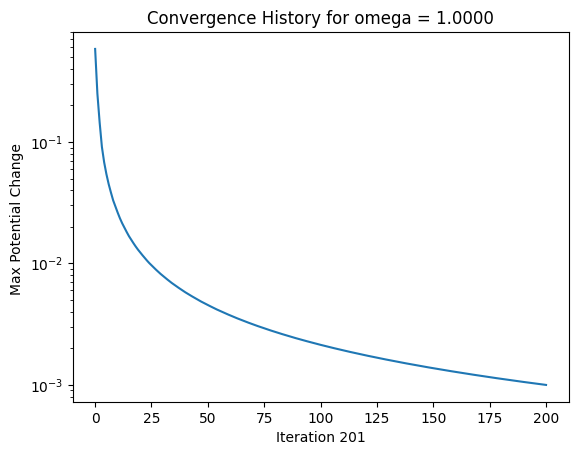

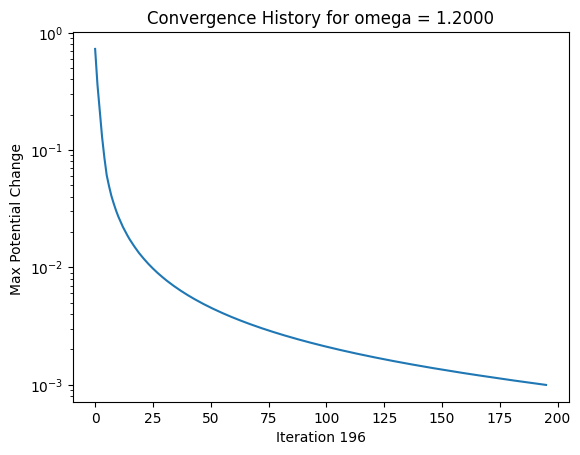

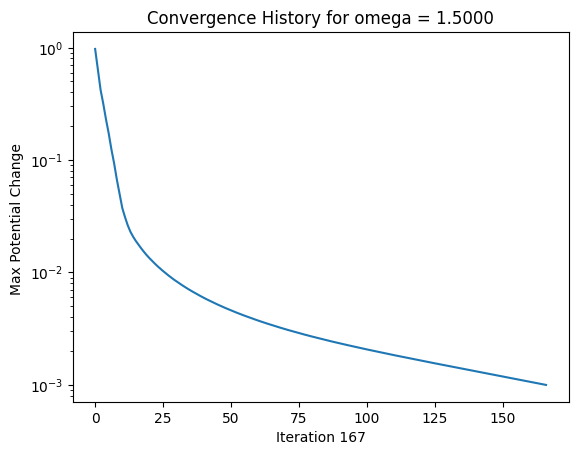

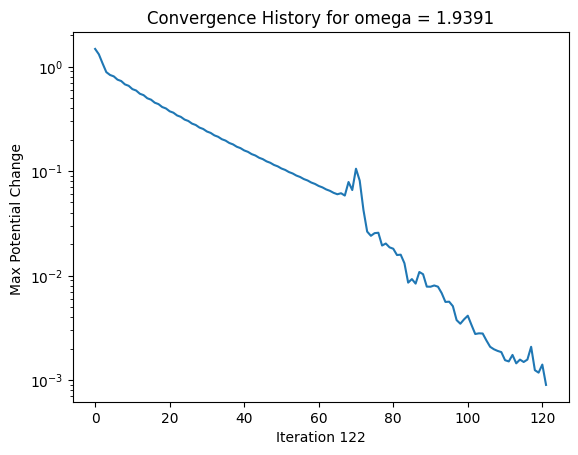

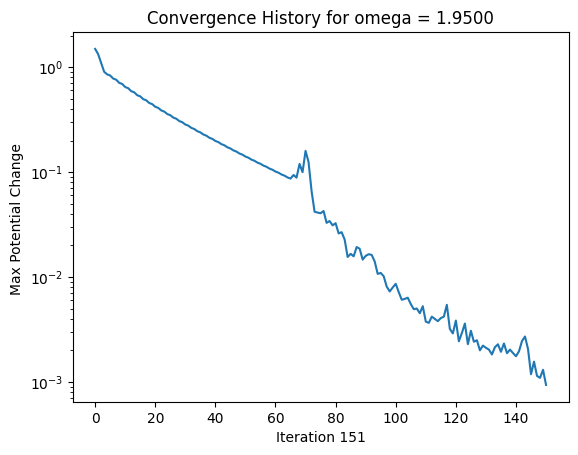

CPU execution time 13.908290928000007 seconds


In [26]:
#2.SOR


omega_theoretical = 2.0 / (1.0 + np.sin(np.pi * h))

omega_values = [1.0, 1.2, 1.5, omega_theoretical, 1.95]

start_3 = time.process_time()

V_final = None

for omega in omega_values:

    V_3 = V_initial.copy()
    convergence_history_sor = []
    convergence_history_sor_best_omega = []
    max_change = 1.0
    iterations_sor = 0

    while max_change > tolerance:
        max_change = 0.0
        for i in range(1, N-1):
            for j in range(1, N-1):
                if not is_boundary[i, j]:
                    old_potential = V_3[i, j]
                    V_sor = 0.25 * (V_3[i+1, j] + V_3[i-1, j] + V_3[i, j+1] + V_3[i, j-1])
                    new_potential = (1.0 - omega) * old_potential + omega * V_sor
                    V_3[i, j] = new_potential
                    change = abs(new_potential - old_potential)
                    if change > max_change:
                        max_change = change
                    
        convergence_history_sor.append(max_change)

        if omega == 1.95:
            convergence_history_sor_best_omega.append(max_change)

        iterations_sor += 1

    if omega == 1.95:
        V_final = V_3.copy()


    plt.figure()
    plt.plot(convergence_history_sor)
    plt.yscale('log')
    plt.title(f'Convergence History for omega = {omega:.4f}')
    plt.xlabel(f'Iteration {iterations_sor}')
    plt.ylabel('Max Potential Change ')
    plt.show()

end_3 = time.process_time()
print('CPU execution time', end_3 - start_3, 'seconds')

#### For point 3 the mathematical formula is describing what we have in the code under the variable name max_change inside the while loop

- in the task sentence we basically have abs(new_potential - old_potential)

#### For point 5 the solution is in the SOR algorithm implementation code, we can determine which gives the fastest convergence by looking at the iteration number


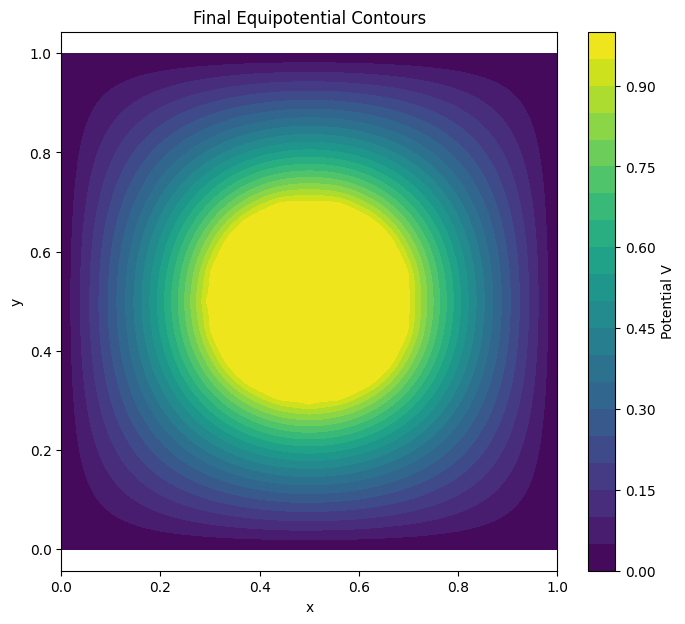

In [16]:
#5. a) the final potential (equipotential contours)

plt.figure(figsize=(8,7))
plt.contourf(xx, yy, V_final, levels=20, cmap = 'viridis')
plt.colorbar(label ='Potential V')
plt.axis('equal')
plt.title('Final Equipotential Contours')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

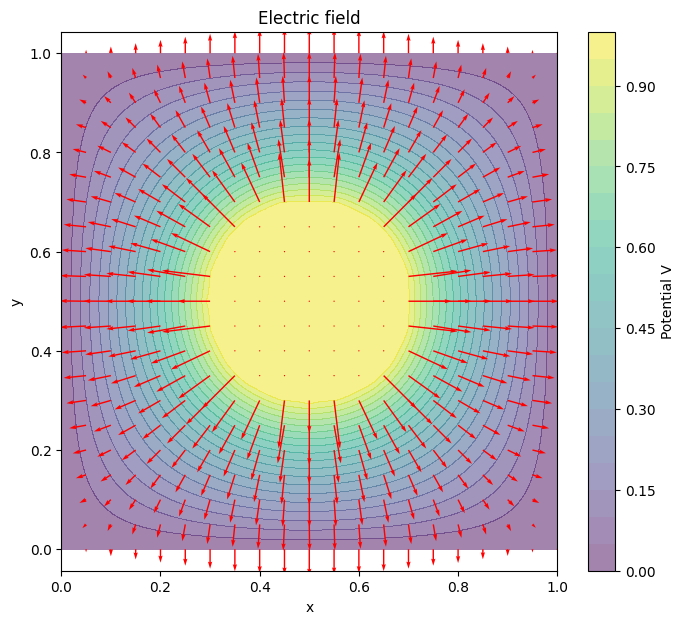

In [18]:
#5. b) electric field vectors

V_y, V_x = np.gradient(V_final, h)

E_x = -V_x
E_y = -V_y

plt.figure(figsize=(8,7))
plt.contourf(xx, yy, V_final, levels=20, cmap = 'viridis', alpha=0.5)
plt.colorbar(label='Potential V')
skip = 5

plt.quiver(xx[::skip, ::skip],
           yy[::skip, ::skip],
           E_x[::skip, ::skip],
           E_y[::skip, ::skip],
           color = 'red', scale=50)
plt.axis('equal')
plt.title('Electric field')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

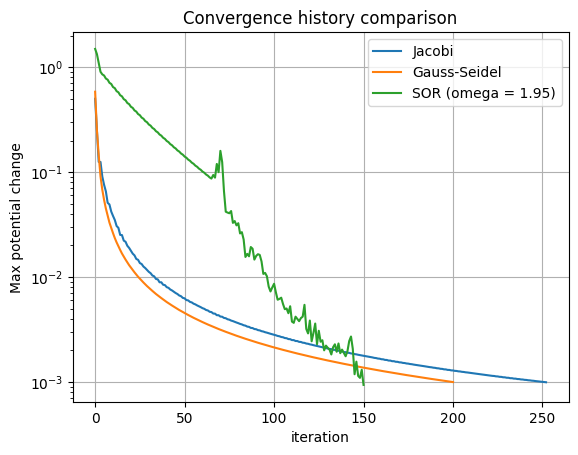

In [27]:
#5. c) convergence history for the three methods

plt.figure()
plt.plot(convergence_history_jacobi, label='Jacobi')
plt.plot(convergence_history_gauss, label='Gauss-Seidel')
plt.plot(convergence_history_sor_best_omega, label='SOR (omega = 1.95)')

plt.yscale('log')
plt.legend()
plt.title('Convergence history comparison')
plt.xlabel('iteration')
plt.ylabel('Max potential change')
plt.grid(True)
plt.show()

#### Task 6 is implemented in each code



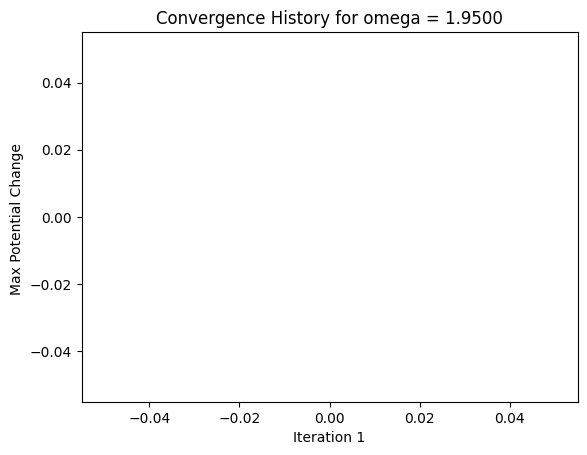

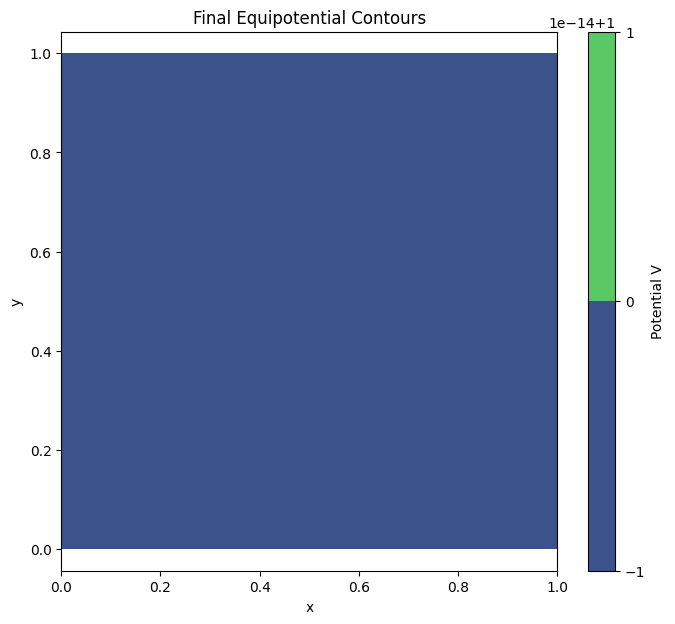

In [34]:
#7. boundaries at all four sides is changed to V=1. plot the solution using SOR approach


V_initial_task7 = np.ones((N,N))
is_boundary_task7 = np.full((N,N), False, dtype=bool)

is_boundary[0, :] = True
is_boundary[N-1, :] = True
is_boundary[:, 0] = True
is_boundary[:, -1] = True

dist_sq = (xx-0.5)**2 + (yy-0.5)**2
circle_mask = dist_sq <= 0.2**2
is_boundary_task7[circle_mask] = True

omega_value = 1.95
convergence_history_sor = [] 
max_change = 1.0
iterations_sor = 0

while max_change > tolerance:
    max_change = 0.0
    for i in range(1, N-1):
        for j in range(1, N-1):
            if not is_boundary_task7[i, j]:
                old_potential = V_initial_task7[i, j]
                V_sor = 0.25 * (V_initial_task7[i+1, j] + V_initial_task7[i-1, j] + V_initial_task7[i, j+1] + V_initial_task7[i, j-1])
                new_potential = (1.0 - omega_value) * old_potential + omega_value * V_sor
                V_initial_task7[i, j] = new_potential
                change = abs(new_potential - old_potential)
                if change > max_change:
                    max_change = change
                    
        
    convergence_history_sor.append(max_change)
    iterations_sor += 1

    

plt.figure()
plt.plot(convergence_history_sor)
plt.title(f'Convergence History for omega = {omega:.4f}')
plt.xlabel(f'Iteration {iterations_sor}')
plt.ylabel('Max Potential Change ')
plt.show()


plt.figure(figsize=(8,7))
plt.contourf(xx, yy, V_initial_task7, levels=20, cmap = 'viridis')
plt.colorbar(label ='Potential V')
plt.axis('equal')
plt.title('Final Equipotential Contours')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


##### The code ends after just one iteration since our initial grid is already the correct final answer